In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [21]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np

In [22]:
# Read the data from the CSV file with read from Numpy
data = np.genfromtxt("Salary_dataset.csv",delimiter=',',skip_header=1)

print(data)

[[0.00000e+00 1.20000e+00 3.93440e+04]
 [1.00000e+00 1.40000e+00 4.62060e+04]
 [2.00000e+00 1.60000e+00 3.77320e+04]
 [3.00000e+00 2.10000e+00 4.35260e+04]
 [4.00000e+00 2.30000e+00 3.98920e+04]
 [5.00000e+00 3.00000e+00 5.66430e+04]
 [6.00000e+00 3.10000e+00 6.01510e+04]
 [7.00000e+00 3.30000e+00 5.44460e+04]
 [8.00000e+00 3.30000e+00 6.44460e+04]
 [9.00000e+00 3.80000e+00 5.71900e+04]
 [1.00000e+01 4.00000e+00 6.32190e+04]
 [1.10000e+01 4.10000e+00 5.57950e+04]
 [1.20000e+01 4.10000e+00 5.69580e+04]
 [1.30000e+01 4.20000e+00 5.70820e+04]
 [1.40000e+01 4.60000e+00 6.11120e+04]
 [1.50000e+01 5.00000e+00 6.79390e+04]
 [1.60000e+01 5.20000e+00 6.60300e+04]
 [1.70000e+01 5.40000e+00 8.30890e+04]
 [1.80000e+01 6.00000e+00 8.13640e+04]
 [1.90000e+01 6.10000e+00 9.39410e+04]
 [2.00000e+01 6.90000e+00 9.17390e+04]
 [2.10000e+01 7.20000e+00 9.82740e+04]
 [2.20000e+01 8.00000e+00 1.01303e+05]
 [2.30000e+01 8.30000e+00 1.13813e+05]
 [2.40000e+01 8.80000e+00 1.09432e+05]
 [2.50000e+01 9.10000e+00

In [23]:
# Separate the features (YearsExperience) from the target variable (Salary)
X = data[:, 1]  # La deuxième colonne représente YearsExperience
y = data[:, 2]  # La troisième colonne représente Salary

print(X, y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6] [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


(-5000.0, 140000.0)

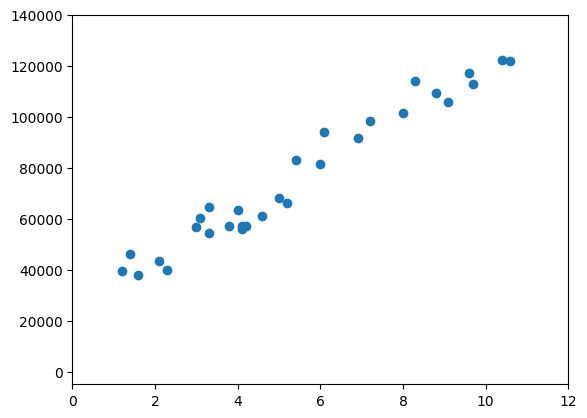

In [100]:
#This time seaborn is forbidden, you have to find a library that works with numpy
import matplotlib.pyplot as plt


#You have to reproduce this graph
plt.scatter(X, y)
plt.xlim(0, 12)
plt.ylim(-5000, 140000)

In [101]:
# Let's create a function that displays the point line with the bar.
def visualize(theta, X, y):
    plt.scatter(X, y)
    plt.xlim(0, 12)
    plt.ylim(-5000, 140000)
    plt.plot(X, theta[0]  + theta[1] * X, color='blue')
    # plt.show()

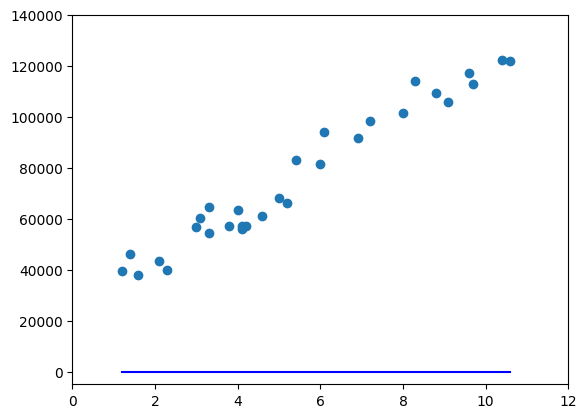

In [102]:
# Ok, let's test our function now, you should get a result comparable to this one

theta = np.zeros(2)
visualize(theta, X, y)

In [103]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

def predict(X, theta):
    prediction = theta[0] + theta[1] * X
    return prediction

In [104]:
def fit(X, y, theta, alpha, num_iters):
    m = len(y)  # Nombre d'exemples d'entraînement

    for i in range(num_iters):
        # Calcul des prédictions
        predictions = predict(X, theta)

        # Calcul de l'erreur
        error = predictions - y

        # Mise à jour des paramètres
        theta[0] = theta[0] - (alpha / m) * np.sum(error)
        theta[1] = theta[1] - (alpha / m) * np.sum(error * X)

    return theta


In [105]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000

theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1000)
print(finetuned_theta)

#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]

[21912.58918422  9880.81400461]


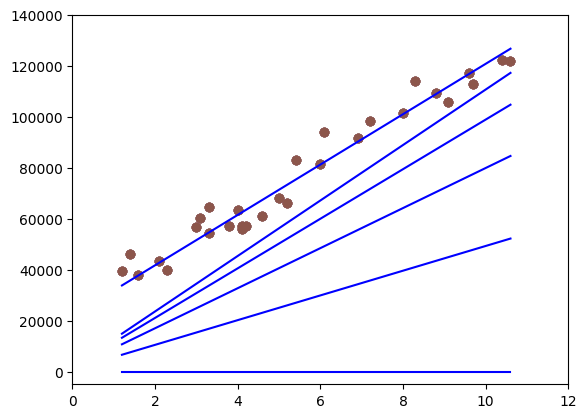

In [106]:
# Ok, let's test our function now, you should get a result comparable to this one
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 0), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 1), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 2), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 3), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 4), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 1000), X, y)


In [107]:
def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    err = predict(X, theta) - y

    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    cost = np.sum(err ** 2) / (2 * len(X))

    # Return the computed cost as a measure of model fit
    return cost



In [108]:
# Test it with theta = [0,0]. You should get approximately 3251553638.

cost_for_theta_zero = cost(X, y, [0, 0])
print(cost_for_theta_zero)

3251553638.866667


In [126]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store cost values at each iteration

    # Loop over the specified number of iterations
    for itr in range(num_iters):
        # Calculate the loss (difference between predictions and actual values)
        J = cost(X, y, theta)
        # Update the temporary values of theta for both coefficients using the gradient descent formula
        J_history.append(J)
        # Update the theta values
        predictions = predict(X, theta)

        errors = predictions - y
        # gradient = np.dot(X.T, errors) / m
        # theta = theta - alpha * gradient
        theta[0] = theta[0] - (alpha / m) * np.sum(errors)
        theta[1] = theta[1] - (alpha / m) * np.sum(errors * X)

    return theta, J_history

In [127]:
# First, we initialize theta to zero
theta = np.zeros(2)

# Start the training using your new function
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

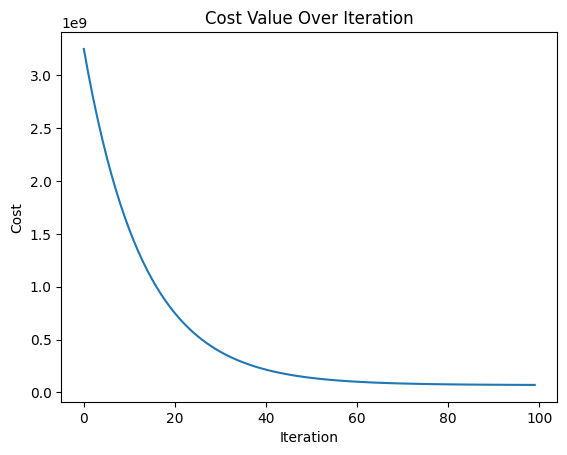

In [128]:
#You have to reproduce this graph
plt.plot(range(len(J_history)), J_history,)
plt.title('Cost Value Over Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [129]:
# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
# new_theta, J_history =  fit_with_cost(X, y, theta, 0.001, 10000)
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))

Predicted salary for 10 years of experience 127134.91360616997


In [130]:
#Predicted salary for 10 years of experience 127134.91360616997
#                                            119347.82718107398